Name:Shrey Pachauri<br>3COE13

In [20]:
import pandas as pd

data_path = "https://archive.ics.uci.edu/static/public/45/data.csv"
dataset = pd.read_csv(data_path)

dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


###Importing Necessary Libraries

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve
import warnings
warnings.filterwarnings('ignore')

In [22]:
dataset.shape

(303, 14)

In [33]:
dataset.isnull().sum()
dataset = dataset.dropna()

In [34]:
X = dataset.iloc[:,0:-1]
y = dataset['num']

In [35]:
ss = StandardScaler()

ss.fit_transform(X)

array([[ 0.93618065,  0.69109474, -2.24062879, ...,  2.26414539,
        -0.72197605,  0.65587737],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         2.47842525, -0.89422007],
       [ 1.3789285 ,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       ...,
       [ 1.48961547,  0.69109474,  0.87388018, ...,  0.6437811 ,
         1.41162482,  1.17257652],
       [ 0.27205887,  0.69109474,  0.87388018, ...,  0.6437811 ,
         0.34482438,  1.17257652],
       [ 0.27205887, -1.44697961, -1.20245913, ...,  0.6437811 ,
         0.34482438, -0.89422007]])

###Creation of 10 samples with 70-30 ratio of Training and Testing Set

In [36]:
samples = []
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    samples.append((X_train, X_test, y_train, y_test))

In [37]:
samples

[(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
  170   70    1   3       160   269    0        0      112      1      2.9   
  177   56    1   4       132   184    0        2      105      1      2.1   
  54    60    1   4       130   253    0        0      144      1      1.4   
  136   70    1   4       145   174    0        0      125      1      2.6   
  18    48    0   3       130   275    0        0      139      0      0.2   
  ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
  254   43    1   4       115   303    0        0      181      0      1.2   
  195   67    1   4       100   299    0        2      125      1      0.9   
  118   63    1   4       130   330    1        2      132      1      1.8   
  47    50    1   4       150   243    0        2      128      0      2.6   
  174   64    1   4       145   212    0        2      132      0      2.0   
  
       slope   ca  thal  
  170      2  1.0   7.0  
  177    

### Creation of a Fitness Function

In [38]:
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
result = pd.DataFrame(columns=['Sample', 'Best Accuracy', 'Best Kernel', 'Best Nu', 'Best Epsilon'])

In [39]:
def fitnessFunction(kernel, C, gamma):
  svm = SVC(kernel=kernel, C=C, gamma=gamma, max_iter=100)
  svm.fit(X_train, y_train)
  y_pred = svm.predict(X_test)
  return accuracy_score(y_pred, y_test)

### Calling the Function for Every Sample

In [40]:
for i in range(len(samples)):
  best_accuracy = 0
  best_C = 0
  best_gamma = 0
  for kernel in kernels:
    X_train, X_test, y_train, y_test = samples[i]
    C = np.random.uniform(0, 10)
    gamma = np.random.uniform(0, 10)
    score = fitnessFunction(kernel, C, gamma)
    if score>best_accuracy:
      best_accuracy = round(score, 2)
      best_C = round(C, 2)
      best_gamma = round(gamma, 2)
      best_kernel = kernel
  print('Best Accuracy = ', best_accuracy, 'Best Kernel = ', best_kernel, 'Best Nu = ', best_C, 'Best Epsilon = ', best_gamma)
  result.loc[i] = [i+1, best_accuracy, best_kernel, best_C, best_gamma]

Best Accuracy =  0.53 Best Kernel =  sigmoid Best Nu =  6.58 Best Epsilon =  8.62
Best Accuracy =  0.57 Best Kernel =  rbf Best Nu =  9.38 Best Epsilon =  3.04
Best Accuracy =  0.52 Best Kernel =  sigmoid Best Nu =  5.47 Best Epsilon =  0.35
Best Accuracy =  0.56 Best Kernel =  rbf Best Nu =  5.55 Best Epsilon =  0.05
Best Accuracy =  0.47 Best Kernel =  rbf Best Nu =  5.19 Best Epsilon =  8.45
Best Accuracy =  0.5 Best Kernel =  rbf Best Nu =  2.46 Best Epsilon =  4.78
Best Accuracy =  0.58 Best Kernel =  rbf Best Nu =  0.59 Best Epsilon =  5.1
Best Accuracy =  0.51 Best Kernel =  sigmoid Best Nu =  0.16 Best Epsilon =  2.4
Best Accuracy =  0.52 Best Kernel =  sigmoid Best Nu =  3.2 Best Epsilon =  2.03
Best Accuracy =  0.49 Best Kernel =  rbf Best Nu =  6.97 Best Epsilon =  4.11


###Creation of a Result Table

In [41]:
result

,Sample,Best Accuracy,Best Kernel,Best Nu,Best Epsilon
0,1,0.53,sigmoid,6.58,8.62
1,2,0.57,rbf,9.38,3.04
2,3,0.52,sigmoid,5.47,0.35
3,4,0.56,rbf,5.55,0.05
4,5,0.47,rbf,5.19,8.45
5,6,0.50,rbf,2.46,4.78
6,7,0.58,rbf,0.59,5.10
7,8,0.51,sigmoid,0.16,2.40
8,9,0.52,sigmoid,3.20,2.03
9,10,0.49,rbf,6.97,4.11


### Plotting of the Convergence Graph/Linear Curve

In [42]:
X_train, X_test, y_train, y_test = samples[result['Best Accuracy'].idxmax()]

In [43]:
train_sizes, train_scores, test_scores = learning_curve(SVC(kernel=result['Best Kernel'].iloc[result['Best Accuracy'].idxmax()],
                                                        C=result['Best Nu'].iloc[result['Best Accuracy'].idxmax()],
                                                        gamma=result['Best Epsilon'].iloc[result['Best Accuracy'].idxmax()],
                                                        max_iter = 100), X_train, y_train, cv=10, scoring='accuracy', n_jobs=-1,
                                                        train_sizes = np.linspace(0.01, 1.0, 50))

In [44]:

train_sizes

array([  1,   5,   9,  13,  16,  20,  24,  28,  31,  35,  39,  43,  46,
        50,  54,  58,  61,  65,  69,  73,  77,  80,  84,  88,  92,  95,
        99, 103, 107, 110, 114, 118, 122, 125, 129, 133, 137, 140, 144,
       148, 152, 155, 159, 163, 167, 170, 174, 178, 182, 186])

In [46]:
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

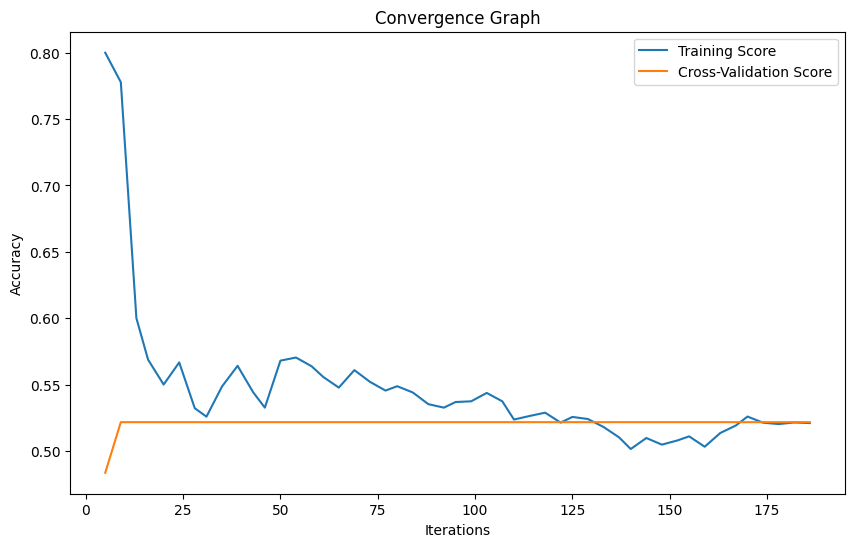

In [47]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score')
plt.plot(train_sizes, test_mean, label='Cross-Validation Score')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.title('Convergence Graph')
plt.legend(loc="best")
plt.show()